# Import Libraries and data

In [ ]:
!pip install split-folders

In [ ]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img
from tensorflow.keras.preprocessing import image
from keras import layers
from keras import regularizers
import splitfolders
from shutil import copyfile
from PIL import Image
from google.colab import drive
import numpy as np
import cv2 as cv
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Access the dataset from google drive

In [ ]:
# Mount Google Drive
drive.mount('/content/drive')

# Set the path to your Google Drive
drive_path = '/content/drive/MyDrive/lung_dataset'

# List the contents of your Google Drive
drive_contents = os.listdir(drive_path)

# Print the contents
print("Contents of Google Drive:")
print(drive_contents)


Mounted at /content/drive

Contents of Google Drive:

['PNEUMONIA', 'HEALTHY', 'COVID']


# Observe data

## Number of images in each class

In [ ]:
dataset_path = '/content/drive/MyDrive/lung_dataset'

# Get the list of classes (subdirectories)
classes = os.listdir(dataset_path)

# Iterate through each class and count the number of images
for class_name in classes:
    class_path = os.path.join(dataset_path, class_name)

    # Check if it's a directory
    if os.path.isdir(class_path):
        # Get the list of files (images) in the class
        images = os.listdir(class_path)

        # Count the number of images in the class
        num_images = len(images)

        # Print the result
        print(f"Class: {class_name}, Number of images: {num_images}")


Class: PNEUMONIA, Number of images: 1345

Class: HEALTHY, Number of images: 10192

Class: COVID, Number of images: 3616


## Examples of images from each class

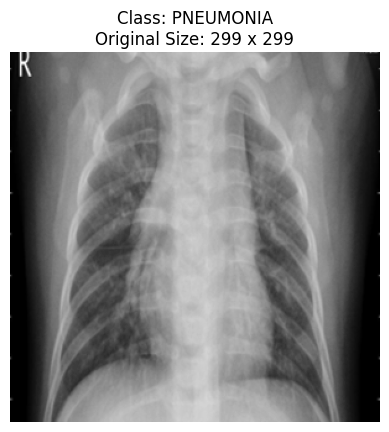

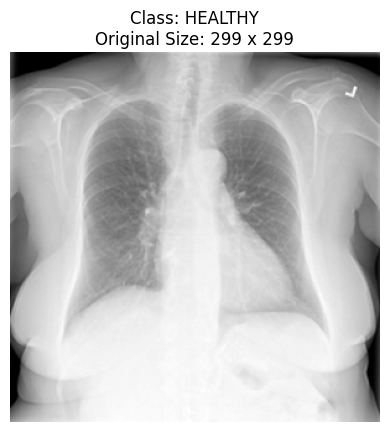

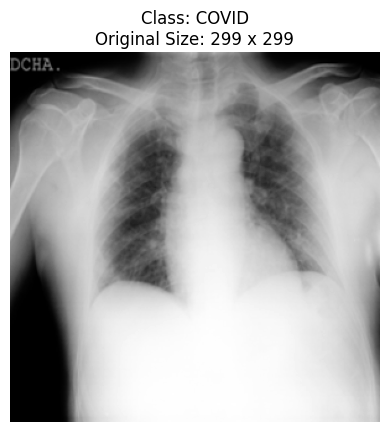

In [ ]:
# Set the path to your dataset
dataset_path = '/content/drive/MyDrive/lung_dataset'

# Get a list of class folders
class_folders = [class_name for class_name in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, class_name))]

# Display example images for each class
for class_name in class_folders:
    class_folder = os.path.join(dataset_path, class_name)
    example_image_path = os.path.join(class_folder, os.listdir(class_folder)[0])

    # Load and display the example image with its original size
    img = Image.open(example_image_path)
    plt.imshow(img, cmap='gray')
    plt.title(f'Class: {class_name}\nOriginal Size: {img.size[0]} x {img.size[1]}')
    plt.axis('off')
    plt.show()


# Histogram Equalisation

source: https://medium.com/@kyawsawhtoon/a-tutorial-to-histogram-equalization-497600f270e2

In [ ]:
path = "/content/drive/MyDrive/lung_dataset/COVID/COVID (1).png"
img = cv.imread(path)

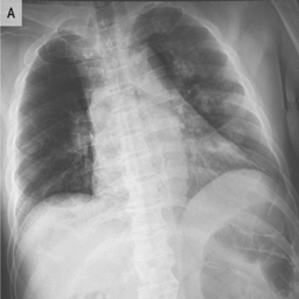

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(img)


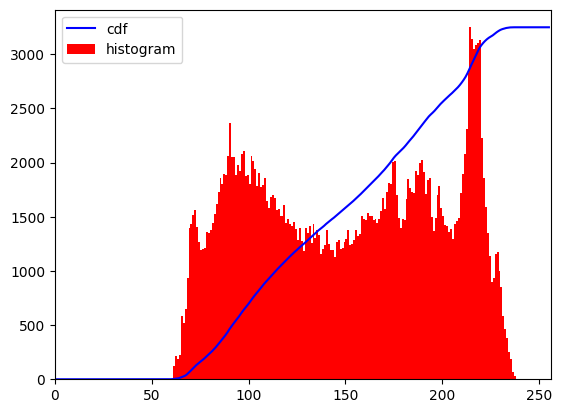

In [ ]:
hist,bins = np.histogram(img.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

In [ ]:
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
equ = cv.equalizeHist(img_gray)


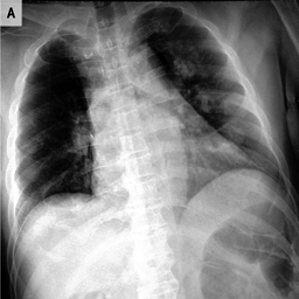

In [ ]:
cv2_imshow(equ)

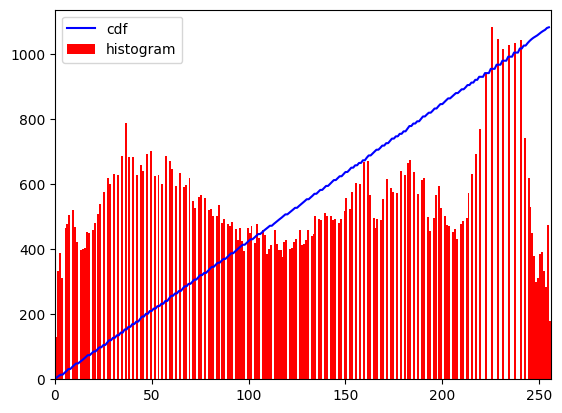

In [ ]:
hist,bins = np.histogram(equ.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(equ.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

In [ ]:
import os
import cv2 as cv
import numpy as np

# Define the paths for the original dataset and the new pre-processed dataset
original_dataset_path = '/content/drive/MyDrive/lung_dataset'
hist_dataset_path = '/content/drive/MyDrive/lung_dataset_w_hist'

# Create the new folder if it doesn't exist
if not os.path.exists(hist_dataset_path):
    os.makedirs(hist_dataset_path)

def apply_hist_eq(original_folder_path, histogram_folder_path, class_name):
    # Create the new class folder if it doesn't exist
    if not os.path.exists(histogram_folder_path):
        os.makedirs(histogram_folder_path)

    # Get the list of files (images) in the class
    images = os.listdir(original_folder_path)

    for image in images:
        img_path = os.path.join(original_folder_path, image)

        # Print the image path for debugging
        print(f"Processing image: {img_path}")

        # Load the image using cv.imread
        img = cv.imread(img_path)

        # Check if the image is loaded successfully
        if img is not None:
            # Check if the image is not already in grayscale
            if len(img.shape) == 3:
                img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
            else:
                img_gray = img

            # Ensure that the image data type is np.uint8
            img_gray = img_gray.astype(np.uint8)

            # Apply histogram equalization
            equ = cv.equalizeHist(img_gray)

            # Save the equalized image to the new class folder
            equ_path = os.path.join(histogram_folder_path, image)
            cv.imwrite(equ_path, equ)
        else:
            print(f"Error loading the image: {img_path}")



for class_name in ['COVID', 'PNEUMONIA', 'HEALTHY']:
    original_split_path = os.path.join(original_dataset_path, class_name)
    hist_split_path = os.path.join(hist_dataset_path, class_name)
    apply_hist_eq(original_split_path, hist_split_path, class_name)


Streaming output truncated to the last 5000 lines.

Processing image: /content/drive/MyDrive/lung_dataset/HEALTHY/HEALTHY (4742).png

Processing image: /content/drive/MyDrive/lung_dataset/HEALTHY/HEALTHY (4797).png

Processing image: /content/drive/MyDrive/lung_dataset/HEALTHY/HEALTHY (4752).png

Processing image: /content/drive/MyDrive/lung_dataset/HEALTHY/HEALTHY (4784).png

Processing image: /content/drive/MyDrive/lung_dataset/HEALTHY/HEALTHY (4769).png

Processing image: /content/drive/MyDrive/lung_dataset/HEALTHY/HEALTHY (4775).png

Processing image: /content/drive/MyDrive/lung_dataset/HEALTHY/HEALTHY (478).png

Processing image: /content/drive/MyDrive/lung_dataset/HEALTHY/HEALTHY (4757).png

Processing image: /content/drive/MyDrive/lung_dataset/HEALTHY/HEALTHY (4783).png

Processing image: /content/drive/MyDrive/lung_dataset/HEALTHY/HEALTHY (474).png

Processing image: /content/drive/MyDrive/lung_dataset/HEALTHY/HEALTHY (4749).png

Processing image: /content/drive/MyDrive/lung_da

# Split data into training, test and validation

In [ ]:
# Set the path to your dataset
dataset_path = '/content/drive/MyDrive/lung_dataset_w_hist'

# Set the path to the output folder where the data will be split
output_path = '/content/drive/MyDrive/lung_dataset_split'

# Specify the ratio for splitting (80% training, 10% validation, 10% testing) for each class
splitfolders.ratio(dataset_path, output=output_path, seed=42, ratio=(0.70, 0.15, 0.15), group_prefix=None)

Copying files: 15153 files [02:35, 97.53 files/s]


## Observe number of images in each class after split

In [ ]:
# Define the paths for training, testing, and validation sets
dataset_path = '/content/drive/MyDrive/lung_dataset_split'

# Function to count the number of image files in a directory
def count_images_in_directory(directory_path, class_name, split_path):
    count = 0
    split_path = os.path.join(directory_path, split_path)
    class_path = os.path.join(split_path, class_name)
    for filename in os.listdir(class_path):
        if filename.endswith(('.jpg', '.jpeg', '.png')):
            count += 1
    return count

# Observe the image counts for each class in the training set
train_count = count_images_in_directory(dataset_path, 'COVID', 'train')
print(f'Training set image count for COVID: {train_count}')

# Observe the image counts for each class in the testing set
test_count = count_images_in_directory(dataset_path, 'HEALTHY', 'train')
print(f'Training set image count for HEALTHY: {test_count}')

# Observe the image counts for each class in the validation set
val_count = count_images_in_directory(dataset_path, 'PNEUMONIA', 'train')
print(f'Training set image count for PNEUMONIA: {val_count}')



Training set image count for COVID: 2531

Training set image count for HEALTHY: 7134

Training set image count for PNEUMONIA: 941


# Model 1 (low res + low epoch)

In [ ]:
# Set the paths to the training, validation, and testing sets

# google colab

#train_path = '/content/drive/MyDrive/lung_dataset_split/train'
#val_path = '/content/drive/MyDrive/lung_dataset_split/val'
#test_path = '/content/drive/MyDrive/lung_dataset_split/test'

# kaggle

train_path = '/kaggle/input/lungdatsetsplit/lung_dataset_split/train'
val_path= '/kaggle/input/lungdatsetsplit/lung_dataset_split/val'
test_path= '/kaggle/input/lungdatsetsplit/lung_dataset_split/test'

# Set the image size and other parameters
img_size = (64, 64)
batch_size = 32

# Set up data generators
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Build the CNN model
model1 = Sequential()

model1.add(Conv2D(32, (3, 3), input_shape=(64, 64, 3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Conv2D(64, (3, 3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Conv2D(128, (3, 3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Flatten())

model1.add(Dense(units=512, activation='relu'))
model1.add(Dense(units=3, activation='softmax'))

# Compile the model
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Found 10606 images belonging to 3 classes.
Found 2271 images belonging to 3 classes.
Found 2276 images belonging to 3 classes.


In [ ]:
model1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 31, 31, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 14, 14, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 6, 6, 128)        

In [ ]:
history = model1.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size,
    epochs= 1
)

331/331 [==============================] - 33s 96ms/step - loss: 0.4285 - accuracy: 0.8220 - val_loss: 0.3096 - val_accuracy: 0.8661


In [ ]:
model1.save('/content/drive/MyDrive/lung_model1')

In [ ]:
test_loss, test_accuracy = model1.evaluate(test_generator)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

72/72 [==============================] - 5s 70ms/step - loss: 0.3053 - accuracy: 0.8801
Test Accuracy: 88.01%


72/72 [==============================] - 5s 69ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.79      0.80       543
           1       0.90      0.93      0.91      1530
           2       0.95      0.71      0.82       203

    accuracy                           0.88      2276
   macro avg       0.89      0.81      0.84      2276
weighted avg       0.88      0.88      0.88      2276

Confusion Matrix:
 [[ 431  108    4]
 [ 100 1427    3]
 [   0   58  145]]


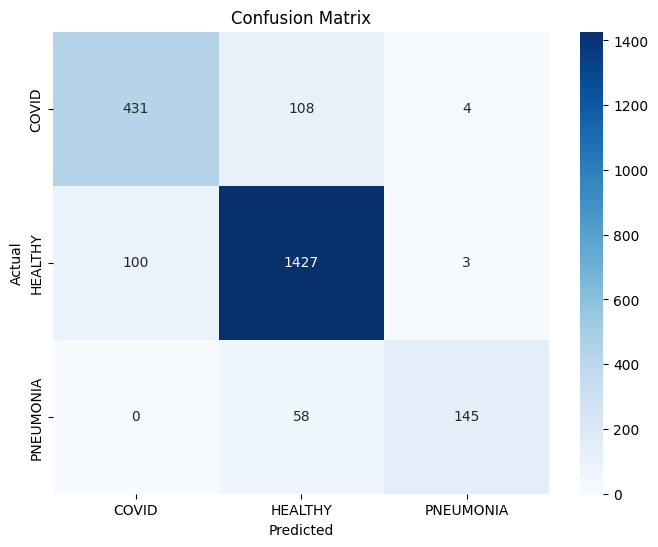

In [ ]:
# Predict classes for the test set
y_pred = model1.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes

# Print classification report and confusion matrix
print("Classification Report:\n", classification_report(y_true, y_pred_classes))


# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)
print("Confusion Matrix:\n", conf_matrix)

# Define class labels
class_labels = ["COVID", "HEALTHY", "PNEUMONIA"]

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Model 2 (low res)

In [ ]:
# Set the paths to the training, validation, and testing sets
#train_path = '/content/drive/MyDrive/lung_dataset_split/train'
#val_path = '/content/drive/MyDrive/lung_dataset_split/val'
#test_path = '/content/drive/MyDrive/lung_dataset_split/test'

train_path = '/kaggle/input/lungdatsetsplit/lung_dataset_split/train'
val_path= '/kaggle/input/lungdatsetsplit/lung_dataset_split/val'
test_path= '/kaggle/input/lungdatsetsplit/lung_dataset_split/test'

# Set the image size and other parameters
img_size = (64, 64)
batch_size = 32

# Set up data generators
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Build the CNN model
model2 = Sequential()

model2.add(Conv2D(32, (3, 3), input_shape=(64, 64, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(128, (3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Flatten())

model2.add(Dense(units=512, activation='relu'))
model2.add(Dense(units=3, activation='softmax'))

# Compile the model
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Found 10606 images belonging to 3 classes.
Found 2271 images belonging to 3 classes.
Found 2276 images belonging to 3 classes.


In [ ]:
model2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 31, 31, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 14, 14, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_14 (Conv2D)          (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 6, 6, 128)        

In [ ]:
history = model2.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size,
    epochs= 10
)

Epoch 1/10
331/331 [==============================] - 33s 95ms/step - loss: 0.4310 - accuracy: 0.8179 - val_loss: 0.2751 - val_accuracy: 0.8844
Epoch 2/10
331/331 [==============================] - 28s 86ms/step - loss: 0.2635 - accuracy: 0.8911 - val_loss: 0.2908 - val_accuracy: 0.8821
Epoch 3/10
331/331 [==============================] - 28s 85ms/step - loss: 0.2141 - accuracy: 0.9147 - val_loss: 0.3382 - val_accuracy: 0.8522
Epoch 4/10
331/331 [==============================] - 28s 84ms/step - loss: 0.1694 - accuracy: 0.9349 - val_loss: 0.2090 - val_accuracy: 0.9138
Epoch 5/10
331/331 [==============================] - 29s 87ms/step - loss: 0.1414 - accuracy: 0.9429 - val_loss: 0.1701 - val_accuracy: 0.9344
Epoch 6/10
331/331 [==============================] - 29s 88ms/step - loss: 0.1093 - accuracy: 0.9608 - val_loss: 0.1558 - val_accuracy: 0.9429
Epoch 7/10
331/331 [==============================] - 29s 89ms/step - loss: 0.0824 - accuracy: 0.9687 - val_loss: 0.1705 - val_accuracy:

In [ ]:
model2.save('/content/drive/MyDrive/lung_model2')

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model2.evaluate(test_generator, steps=test_generator.samples // batch_size)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

71/71 [==============================] - 13s 176ms/step - loss: 0.2581 - accuracy: 0.9243
Test Accuracy: 92.43%


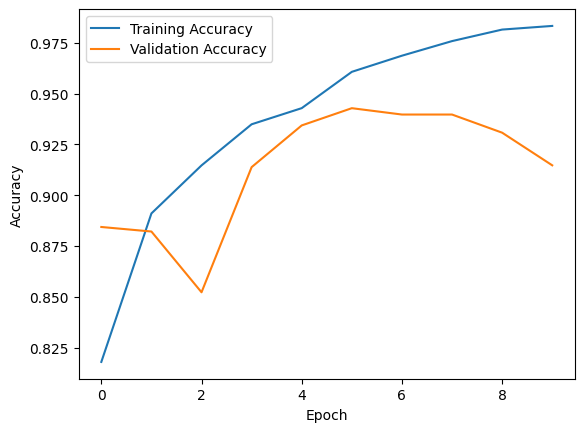

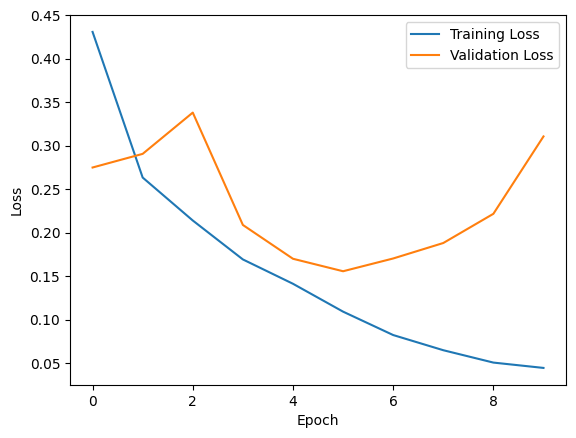

In [ ]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

/tmp/ipykernel_42/1585609864.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  y_pred = model2.predict_generator(test_generator)


Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.77      0.85       543
           1       0.92      0.98      0.95      1530
           2       0.95      0.91      0.93       203

    accuracy                           0.92      2276
   macro avg       0.94      0.89      0.91      2276
weighted avg       0.93      0.92      0.92      2276

Confusion Matrix:
 [[ 419  121    3]
 [  23 1501    6]
 [   2   17  184]]


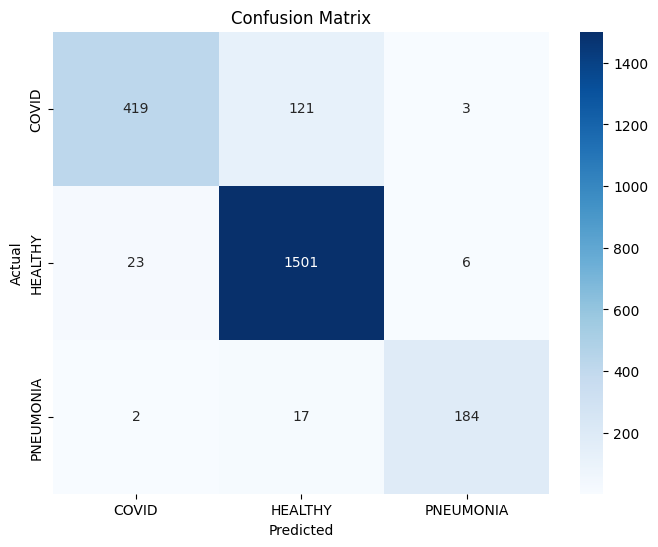

In [ ]:

y_pred = model2.predict_generator(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes


print("Classification Report:\n", classification_report(y_true, y_pred_classes))
# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)
print("Confusion Matrix:\n", conf_matrix)

# Define class labels
class_labels = ["COVID", "HEALTHY", "PNEUMONIA"]

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Model 3 (higher res)

In [ ]:
# Set the paths to the training, validation, and testing sets
#train_path = '/content/drive/MyDrive/lung_dataset_split/train'
#val_path = '/content/drive/MyDrive/lung_dataset_split/val'
#test_path = '/content/drive/MyDrive/lung_dataset_split/test'

train_path = '/kaggle/input/lungdatsetsplit/lung_dataset_split/train'
val_path= '/kaggle/input/lungdatsetsplit/lung_dataset_split/val'
test_path= '/kaggle/input/lungdatsetsplit/lung_dataset_split/test'

# Set the image size and other parameters
img_size = (256, 256)
batch_size = 32

# Set up data generators
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Build the CNN model
model3 = Sequential()

model3.add(Conv2D(32, (3, 3), input_shape=(256, 256, 3), activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))

model3.add(Conv2D(64, (3, 3), activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))

model3.add(Conv2D(128, (3, 3), activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))

model3.add(Flatten())

model3.add(Dense(units=512, activation='relu'))
model3.add(Dense(units=3, activation='softmax'))

# Compile the model
model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Found 10606 images belonging to 3 classes.
Found 2271 images belonging to 3 classes.
Found 2276 images belonging to 3 classes.


In [ ]:
model3.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 127, 127, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_16 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 62, 62, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 30, 30, 128)      

In [ ]:
history = model3.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size,
    epochs=10
)

Epoch 1/10
331/331 [==============================] - 45s 126ms/step - loss: 0.4322 - accuracy: 0.8362 - val_loss: 0.2605 - val_accuracy: 0.9054
Epoch 2/10
331/331 [==============================] - 42s 127ms/step - loss: 0.1951 - accuracy: 0.9240 - val_loss: 0.1892 - val_accuracy: 0.9299
Epoch 3/10
331/331 [==============================] - 40s 121ms/step - loss: 0.1242 - accuracy: 0.9510 - val_loss: 0.1682 - val_accuracy: 0.9424
Epoch 4/10
331/331 [==============================] - 40s 121ms/step - loss: 0.0672 - accuracy: 0.9748 - val_loss: 0.1711 - val_accuracy: 0.9487
Epoch 5/10
331/331 [==============================] - 40s 121ms/step - loss: 0.0491 - accuracy: 0.9833 - val_loss: 0.1773 - val_accuracy: 0.9469
Epoch 6/10
331/331 [==============================] - 40s 121ms/step - loss: 0.0232 - accuracy: 0.9921 - val_loss: 0.2601 - val_accuracy: 0.9357
Epoch 7/10
331/331 [==============================] - 40s 120ms/step - loss: 0.0240 - accuracy: 0.9925 - val_loss: 0.2372 - val_ac

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model3.evaluate(test_generator, steps=test_generator.samples // batch_size)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

71/71 [==============================] - 9s 124ms/step - loss: 0.3592 - accuracy: 0.9300
Test Accuracy: 93.00%


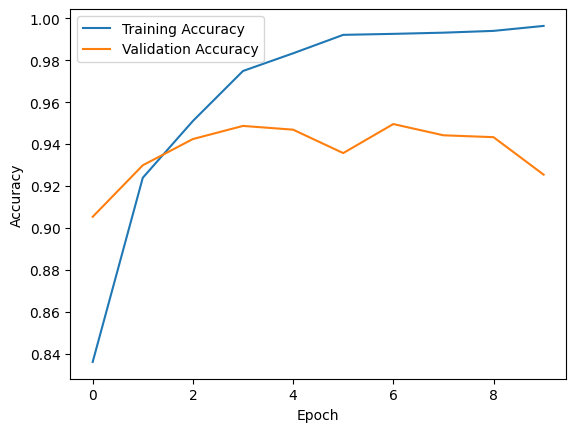

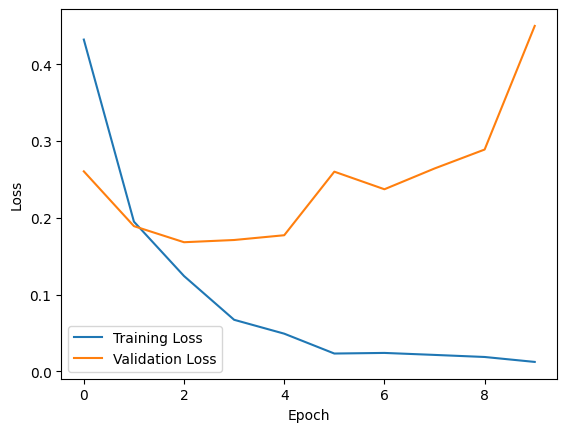

In [ ]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
model3.save('/content/drive/MyDrive/lung_model3')

/tmp/ipykernel_42/30849727.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  y_pred = model3.predict_generator(test_generator)


Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.91      0.91       543
           1       0.97      0.93      0.95      1530
           2       0.75      0.99      0.85       203

    accuracy                           0.93      2276
   macro avg       0.88      0.94      0.90      2276
weighted avg       0.94      0.93      0.93      2276

Confusion Matrix:
 [[ 493   43    7]
 [  48 1424   58]
 [   1    2  200]]


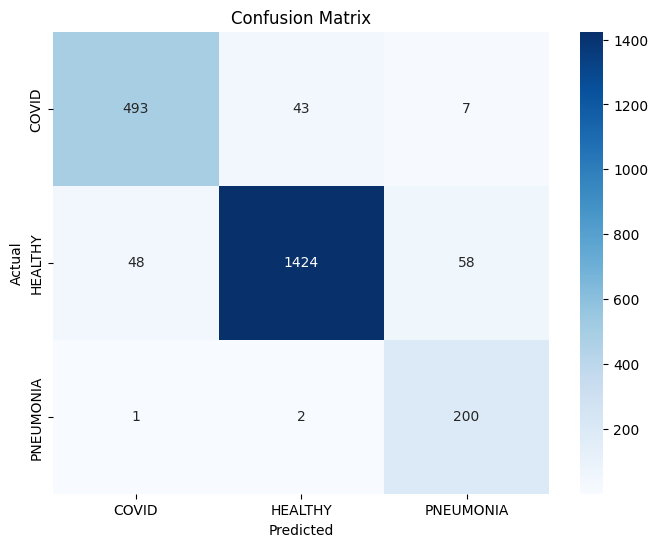

In [ ]:
y_pred = model3.predict_generator(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes


print("Classification Report:\n", classification_report(y_true, y_pred_classes))

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)
print("Confusion Matrix:\n", conf_matrix)

# Define class labels
class_labels = ["COVID", "HEALTHY", "PNEUMONIA"]

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Model 4 (regularization)

In [ ]:
import os

os.listdir('/kaggle/input')

['lung-dataset', 'lungdatsetsplit']

In [ ]:
from keras import layers
from keras import regularizers

# Set the paths to the training, validation, and testing sets
#train_path = '/content/drive/MyDrive/lung_dataset_split/train'
#val_path = '/content/drive/MyDrive/lung_dataset_split/val'
#test_path = '/content/drive/MyDrive/lung_dataset_split/test'

train_path = '/kaggle/input/lungdatsetsplit/lung_dataset_split/train'
val_path= '/kaggle/input/lungdatsetsplit/lung_dataset_split/val'
test_path= '/kaggle/input/lungdatsetsplit/lung_dataset_split/test'

# Set the image size and other parameters
img_size = (256, 256)
batch_size = 32

# Set up data generators
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)



# Build the CNN model
model4 = Sequential()

model4.add(Conv2D(32, (3, 3), input_shape=(256, 256, 3), activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model4.add(MaxPooling2D(pool_size=(2, 2)))

model4.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model4.add(MaxPooling2D(pool_size=(2, 2)))

model4.add(Conv2D(128, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model4.add(MaxPooling2D(pool_size=(2, 2)))

model4.add(Flatten())

model4.add(Dense(units=512, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model4.add(Dense(units=3, activation='softmax'))

# Compile the model
model4.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


Found 10606 images belonging to 3 classes.
Found 2271 images belonging to 3 classes.
Found 2276 images belonging to 3 classes.


In [ ]:
model4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 128)       0

In [ ]:
history = model4.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size,
    epochs=10
)

Epoch 1/10
331/331 [==============================] - 42s 122ms/step - loss: 1.0037 - accuracy: 0.8286 - val_loss: 0.5192 - val_accuracy: 0.8969
Epoch 2/10
331/331 [==============================] - 42s 127ms/step - loss: 0.4865 - accuracy: 0.8951 - val_loss: 0.4302 - val_accuracy: 0.9147
Epoch 3/10
331/331 [==============================] - 44s 132ms/step - loss: 0.4226 - accuracy: 0.9119 - val_loss: 0.3907 - val_accuracy: 0.9232
Epoch 4/10
331/331 [==============================] - 41s 123ms/step - loss: 0.3914 - accuracy: 0.9231 - val_loss: 0.3843 - val_accuracy: 0.9201
Epoch 5/10
331/331 [==============================] - 41s 123ms/step - loss: 0.3692 - accuracy: 0.9237 - val_loss: 0.3634 - val_accuracy: 0.9210
Epoch 6/10
331/331 [==============================] - 41s 125ms/step - loss: 0.3318 - accuracy: 0.9374 - val_loss: 0.3692 - val_accuracy: 0.9232
Epoch 7/10
331/331 [==============================] - 43s 130ms/step - loss: 0.3054 - accuracy: 0.9430 - val_loss: 0.3314 - val_ac

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model4.evaluate(test_generator, steps=test_generator.samples // batch_size)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

71/71 [==============================] - 9s 126ms/step - loss: 0.3633 - accuracy: 0.9265
Test Accuracy: 92.65%


In [ ]:
model4.save('/content/drive/MyDrive/lung_model4')

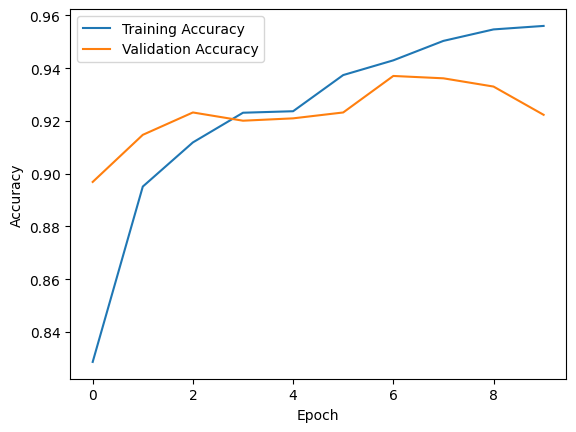

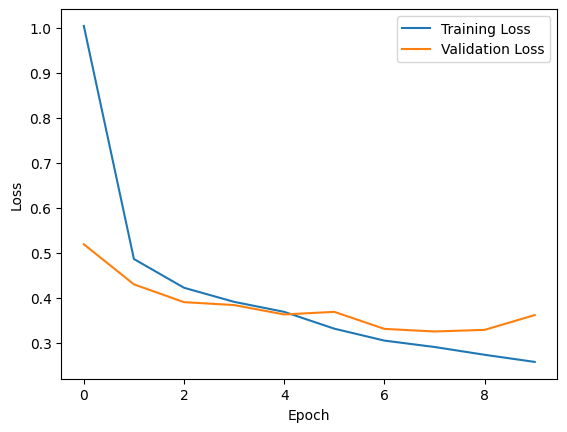

In [ ]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# Plot training and validation accuracy
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

/tmp/ipykernel_42/2409185307.py:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  y_pred = model4.predict_generator(test_generator)


Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.89      0.88       543
           1       0.96      0.94      0.95      1530
           2       0.86      0.94      0.90       203

    accuracy                           0.93      2276
   macro avg       0.90      0.92      0.91      2276
weighted avg       0.93      0.93      0.93      2276

Confusion Matrix:
 [[ 483   52    8]
 [  72 1436   22]
 [   1   12  190]]


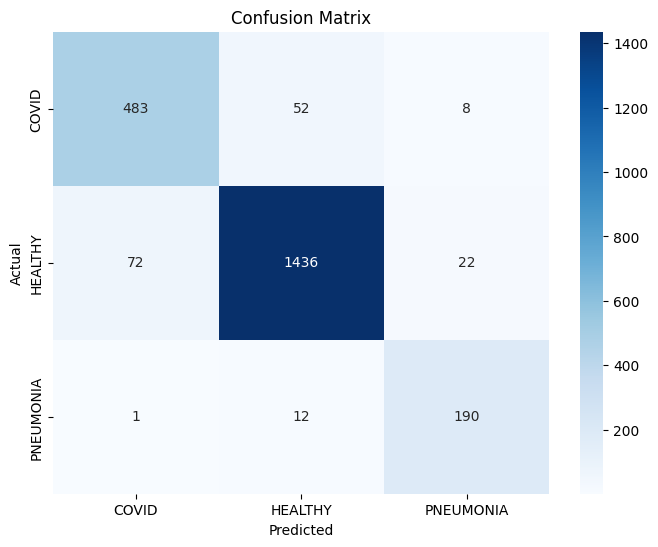

In [ ]:
# Predictions
y_pred = model4.predict_generator(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes

# Classification Report
print("Classification Report:\n", classification_report(y_true, y_pred_classes))

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)
print("Confusion Matrix:\n", conf_matrix)

# Define class labels
class_labels = ["COVID", "HEALTHY", "PNEUMONIA"]

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Model 5 ( less epochs)

In [ ]:
from keras import layers
from keras import regularizers

# Set the paths to the training, validation, and testing sets
#train_path = '/content/drive/MyDrive/lung_dataset_split/train'
#val_path = '/content/drive/MyDrive/lung_dataset_split/val'
#test_path = '/content/drive/MyDrive/lung_dataset_split/test'

train_path = '/kaggle/input/lungdatsetsplit/lung_dataset_split/train'
val_path= '/kaggle/input/lungdatsetsplit/lung_dataset_split/val'
test_path= '/kaggle/input/lungdatsetsplit/lung_dataset_split/test'

# Set the image size and other parameters
img_size = (256, 256)
batch_size = 32

# Set up data generators
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)



# Build the CNN model
model5 = Sequential()

model5.add(Conv2D(32, (3, 3), input_shape=(256, 256, 3), activation='relu'))
model5.add(MaxPooling2D(pool_size=(2, 2)))

model5.add(Conv2D(64, (3, 3), activation='relu'))
model5.add(MaxPooling2D(pool_size=(2, 2)))

model5.add(Conv2D(128, (3, 3), activation='relu'))
model5.add(MaxPooling2D(pool_size=(2, 2)))

model5.add(Flatten())

model5.add(Dense(units=512, activation='relu'))
model5.add(Dense(units=3, activation='softmax'))

# Compile the model
model5.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


Found 10606 images belonging to 3 classes.
Found 2271 images belonging to 3 classes.
Found 2276 images belonging to 3 classes.


In [ ]:
model5.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_21 (MaxPooli  (None, 127, 127, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_22 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_22 (MaxPooli  (None, 62, 62, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_23 (Conv2D)          (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_23 (MaxPooli  (None, 30, 30, 128)      

In [ ]:
history = model5.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size,
    epochs=5

)

Epoch 1/5
331/331 [==============================] - 45s 131ms/step - loss: 0.3915 - accuracy: 0.8472 - val_loss: 0.2469 - val_accuracy: 0.9040
Epoch 2/5
331/331 [==============================] - 41s 123ms/step - loss: 0.1784 - accuracy: 0.9318 - val_loss: 0.1687 - val_accuracy: 0.9371
Epoch 3/5
331/331 [==============================] - 41s 123ms/step - loss: 0.1092 - accuracy: 0.9576 - val_loss: 0.2399 - val_accuracy: 0.9103
Epoch 4/5
331/331 [==============================] - 43s 131ms/step - loss: 0.0785 - accuracy: 0.9716 - val_loss: 0.1965 - val_accuracy: 0.9438
Epoch 5/5
331/331 [==============================] - 41s 124ms/step - loss: 0.0416 - accuracy: 0.9851 - val_loss: 0.1807 - val_accuracy: 0.9469


In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model5.evaluate(test_generator, steps=test_generator.samples // batch_size)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

71/71 [==============================] - 9s 121ms/step - loss: 0.1826 - accuracy: 0.9467
Test Accuracy: 94.67%


In [ ]:
model5.save('/content/drive/MyDrive/lung_model5')

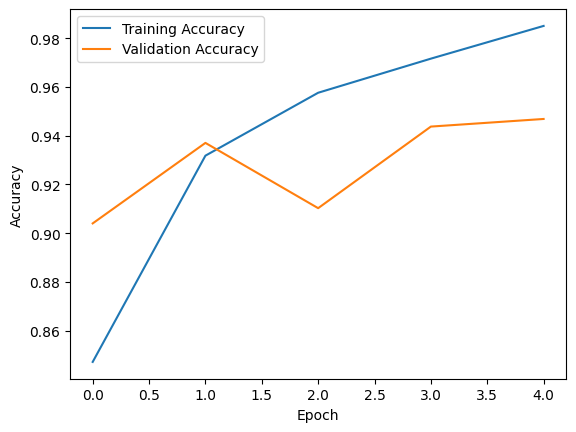

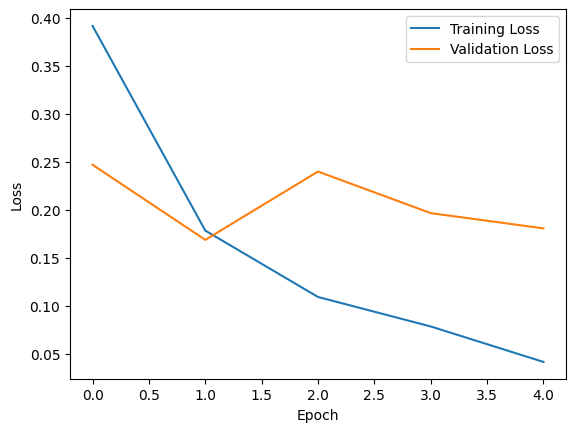

In [ ]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# Plot training and validation accuracy
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

72/72 [==============================] - 8s 106ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.91      0.91       543
           1       0.96      0.96      0.96      1530
           2       0.92      0.94      0.93       203

    accuracy                           0.95      2276
   macro avg       0.93      0.93      0.93      2276
weighted avg       0.95      0.95      0.95      2276

Confusion Matrix:
 [[ 492   46    5]
 [  45 1473   12]
 [   0   13  190]]


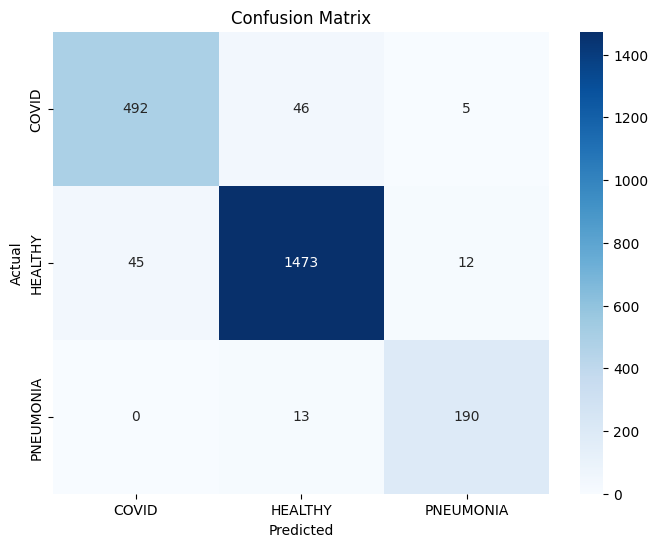

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Predict classes for the test set
y_pred = model5.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes

# Print classification report and confusion matrix
print("Classification Report:\n", classification_report(y_true, y_pred_classes))


# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)
print("Confusion Matrix:\n", conf_matrix)

# Define class labels
class_labels = ["COVID", "HEALTHY", "PNEUMONIA"]

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Model 6 (RMS optimizer)

In [ ]:


# Set the paths to the training, validation, and testing sets
train_path = '/kaggle/input/lungdatsetsplit/lung_dataset_split/train'
val_path = '/kaggle/input/lungdatsetsplit/lung_dataset_split/val'
test_path = '/kaggle/input/lungdatsetsplit/lung_dataset_split/test'

# Set the image size and other parameters
img_size = (256, 256)
batch_size = 32

# Set up data generators
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Build the CNN model
model6 = Sequential()

model6.add(Conv2D(32, (3, 3), input_shape=(256, 256, 3), activation='relu'))
model6.add(MaxPooling2D(pool_size=(2, 2)))

model6.add(Conv2D(64, (3, 3), activation='relu'))
model6.add(MaxPooling2D(pool_size=(2, 2)))

model6.add(Conv2D(128, (3, 3), activation='relu'))
model6.add(MaxPooling2D(pool_size=(2, 2)))

model6.add(Flatten())

model6.add(Dense(units=512, activation='relu'))
model6.add(Dense(units=3, activation='softmax'))

# Compile the model
model6.compile(optimizer='RMSprop', loss='categorical_crossentropy', metrics=['accuracy'])


Found 10606 images belonging to 3 classes.
Found 2271 images belonging to 3 classes.
Found 2276 images belonging to 3 classes.


In [ ]:
model6.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_27 (MaxPooli  (None, 127, 127, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_28 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_28 (MaxPooli  (None, 62, 62, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_29 (Conv2D)          (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_29 (MaxPooli  (None, 30, 30, 128)      

In [ ]:
history = model6.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size,
    epochs=5

)

Epoch 1/5
331/331 [==============================] - 44s 128ms/step - loss: 0.4703 - accuracy: 0.8219 - val_loss: 0.4462 - val_accuracy: 0.7812
Epoch 2/5
331/331 [==============================] - 43s 129ms/step - loss: 0.2268 - accuracy: 0.9109 - val_loss: 0.1729 - val_accuracy: 0.9362
Epoch 3/5
331/331 [==============================] - 42s 125ms/step - loss: 0.1472 - accuracy: 0.9430 - val_loss: 0.1565 - val_accuracy: 0.9446
Epoch 4/5
331/331 [==============================] - 41s 125ms/step - loss: 0.0971 - accuracy: 0.9652 - val_loss: 0.1351 - val_accuracy: 0.9567
Epoch 5/5
331/331 [==============================] - 42s 126ms/step - loss: 0.0530 - accuracy: 0.9814 - val_loss: 0.2344 - val_accuracy: 0.9424


In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model6.evaluate(test_generator, steps=test_generator.samples // batch_size)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

71/71 [==============================] - 9s 127ms/step - loss: 0.2416 - accuracy: 0.9362
Test Accuracy: 93.62%


In [ ]:
model6.save('/content/drive/MyDrive/lung_model6')

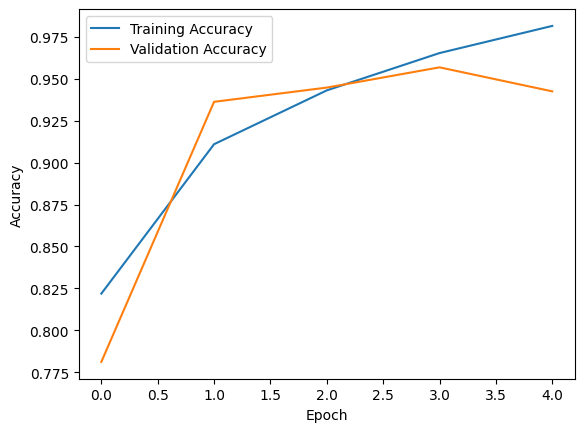

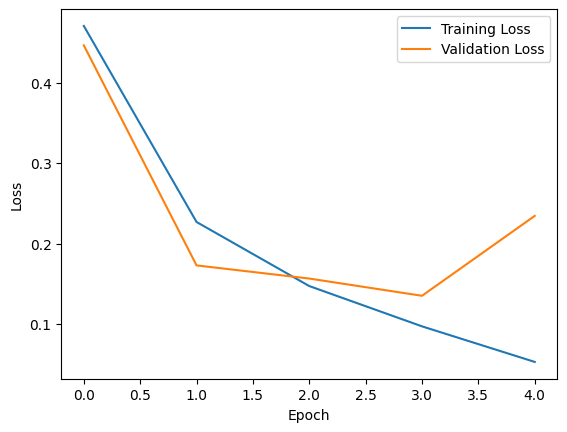

In [ ]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# Plot training and validation accuracy
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

72/72 [==============================] - 8s 108ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.96      0.89       543
           1       0.98      0.93      0.95      1530
           2       0.93      0.95      0.94       203

    accuracy                           0.94      2276
   macro avg       0.92      0.94      0.93      2276
weighted avg       0.94      0.94      0.94      2276

Confusion Matrix:
 [[ 521   20    2]
 [  99 1418   13]
 [   2    9  192]]


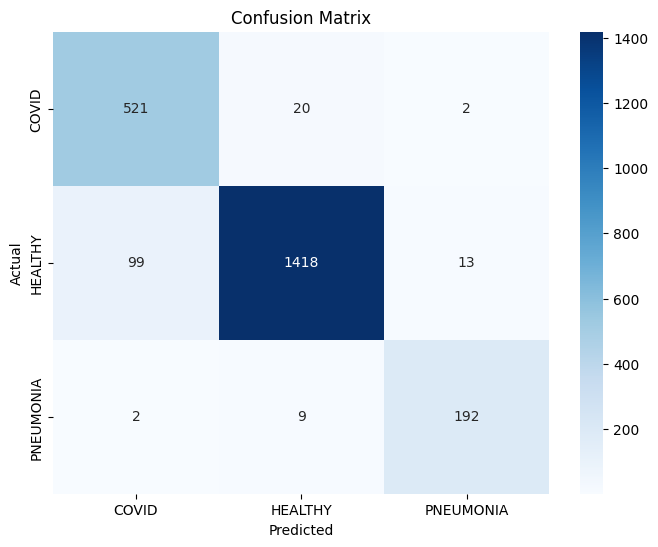

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Predict classes for the test set
y_pred = model6.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes

# Print classification report and confusion matrix
print("Classification Report:\n", classification_report(y_true, y_pred_classes))


# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)
print("Confusion Matrix:\n", conf_matrix)

# Define class labels
class_labels = ["COVID", "HEALTHY", "PNEUMONIA"]

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
model5.save('/content/drive/MyDrive/lung_model5')

# Model 7 (Class weighting)

Source: https://stackoverflow.com/questions/44716150/how-can-i-assign-a-class-weight-in-keras-in-a-simple-way

In [ ]:

# Set the paths to the training, validation, and testing sets
#train_path = '/content/drive/MyDrive/lung_dataset_split/train'
#val_path = '/content/drive/MyDrive/lung_dataset_split/val'
#test_path = '/content/drive/MyDrive/lung_dataset_split/test'

train_path = '/kaggle/input/lungdatsetsplit/lung_dataset_split/train'
val_path= '/kaggle/input/lungdatsetsplit/lung_dataset_split/val'
test_path= '/kaggle/input/lungdatsetsplit/lung_dataset_split/test'

# Set the image size and other parameters
img_size = (256, 256)
batch_size = 32


# Calculate the number of samples in each class for class weights
num_covid_samples = len(os.listdir(os.path.join(train_path, 'COVID')))
num_healthy_samples = len(os.listdir(os.path.join(train_path, 'HEALTHY')))
num_pneumonia_samples = len(os.listdir(os.path.join(train_path, 'PNEUMONIA')))

total_samples = num_covid_samples + num_healthy_samples + num_pneumonia_samples

class_weight_covid = total_samples / (3 * num_covid_samples)
class_weight_healthy = total_samples / (3 * num_healthy_samples)
class_weight_pneumonia = total_samples / (3 * num_pneumonia_samples)

class_weights = {0: class_weight_covid, 1: class_weight_healthy, 2: class_weight_pneumonia}

print(class_weights)

# Set up data generators
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Build the CNN model
model7 = Sequential()

model7.add(Conv2D(32, (3, 3), input_shape=(256, 256, 3), activation='relu'))
model7.add(MaxPooling2D(pool_size=(2, 2)))

model7.add(Conv2D(64, (3, 3), activation='relu'))
model7.add(MaxPooling2D(pool_size=(2, 2)))

model7.add(Conv2D(128, (3, 3), activation='relu'))
model7.add(MaxPooling2D(pool_size=(2, 2)))

model7.add(Flatten())

model7.add(Dense(units=512, activation='relu'))
model7.add(Dense(units=3, activation='softmax'))

# Compile the model
model7.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


{0: 1.3968128539444225, 1: 0.49556116250817683, 2: 3.756996103436061}
Found 10606 images belonging to 3 classes.
Found 2271 images belonging to 3 classes.
Found 2276 images belonging to 3 classes.


In [ ]:
history = model7.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size,
    epochs=5,
    class_weight = class_weights
)

Epoch 1/5
331/331 [==============================] - 45s 130ms/step - loss: 0.4866 - accuracy: 0.7708 - val_loss: 0.3561 - val_accuracy: 0.8558
Epoch 2/5
331/331 [==============================] - 42s 126ms/step - loss: 0.2281 - accuracy: 0.8839 - val_loss: 0.2179 - val_accuracy: 0.9112
Epoch 3/5
331/331 [==============================] - 42s 125ms/step - loss: 0.1624 - accuracy: 0.9186 - val_loss: 0.2498 - val_accuracy: 0.9058
Epoch 4/5
331/331 [==============================] - 43s 129ms/step - loss: 0.1200 - accuracy: 0.9435 - val_loss: 0.2948 - val_accuracy: 0.8830
Epoch 5/5
331/331 [==============================] - 52s 156ms/step - loss: 0.0727 - accuracy: 0.9639 - val_loss: 0.2019 - val_accuracy: 0.9330


In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model7.evaluate(test_generator)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

72/72 [==============================] - 10s 135ms/step - loss: 0.2090 - accuracy: 0.9301
Test Accuracy: 93.01%


In [ ]:
model7.save('/content/drive/MyDrive/lung_model7')

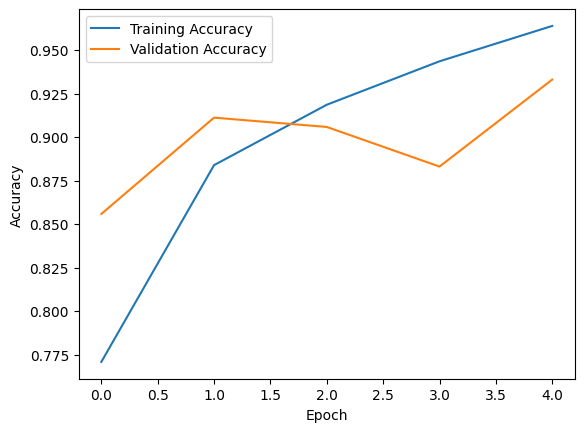

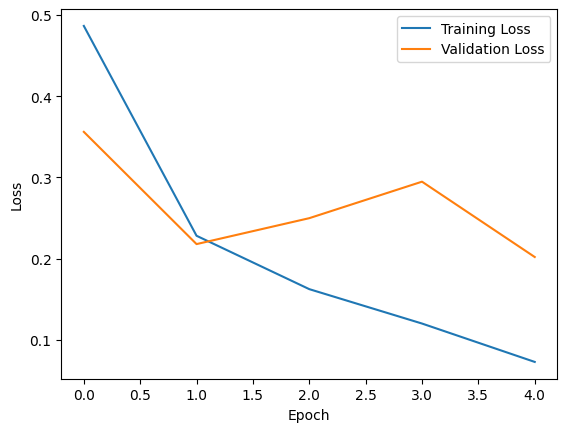

In [ ]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# Plot training and validation accuracy
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

72/72 [==============================] - 8s 115ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.95      0.89       543
           1       0.98      0.92      0.95      1530
           2       0.89      0.95      0.92       203

    accuracy                           0.93      2276
   macro avg       0.90      0.94      0.92      2276
weighted avg       0.94      0.93      0.93      2276

Confusion Matrix:
 [[ 517   21    5]
 [ 105 1407   18]
 [   1    9  193]]


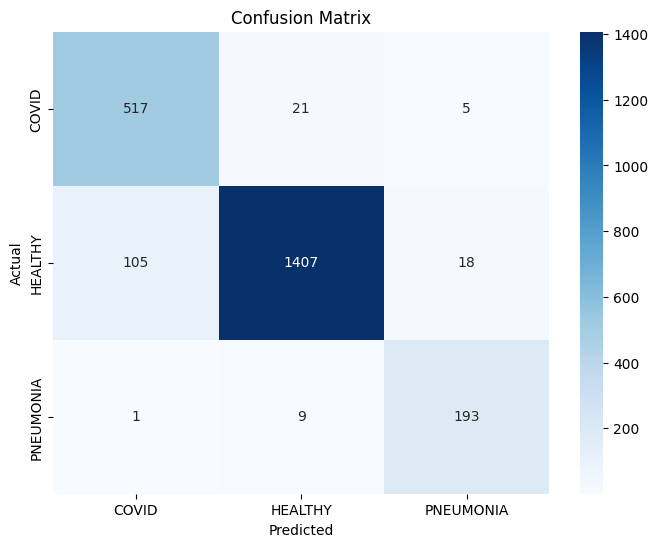

In [ ]:
# Predict classes for the test set
y_pred = model7.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes

# Print classification report and confusion matrix
print("Classification Report:\n", classification_report(y_true, y_pred_classes))


# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)
print("Confusion Matrix:\n", conf_matrix)

# Define class labels
class_labels = ["COVID", "HEALTHY", "PNEUMONIA"]

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Model 8 (With augmentation)

<function matplotlib.pyplot.show(close=None, block=None)>

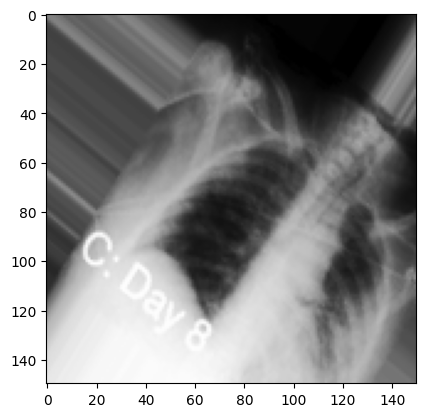

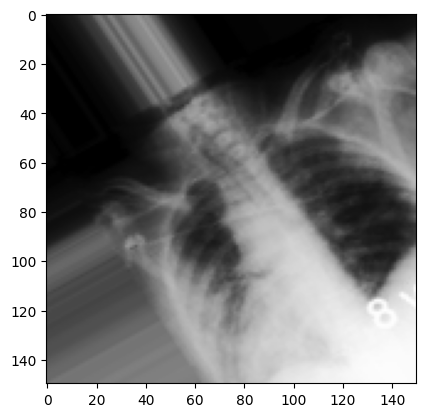

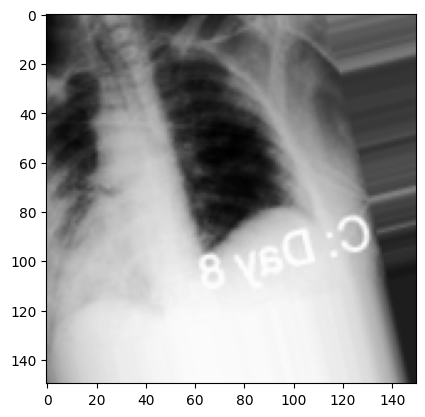

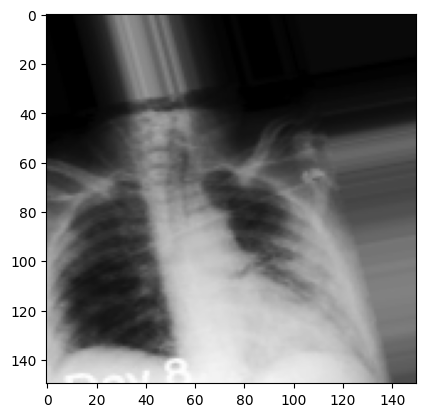

In [ ]:
## source code from 'Deep learning with Python' by Francois Chollet

from keras.preprocessing import image


datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)

path = '/content/drive/MyDrive/lung_dataset_split/train/COVID'

fnames = [os.path.join(path, fname)for
          fname in os.listdir(path)]

img_path = fnames[3]

img = image.load_img(img_path, target_size=(150, 150))

x = image.img_to_array(img)

x = x.reshape((1,)+ x.shape)
i = 0

for batch in datagen.flow(x, batch_size=1):
  plt.figure(i)
  imgplot = plt.imshow(image.array_to_img(batch[0]))
  i +=1
  if i % 4 == 0:
    break

plt.show


In [ ]:
## source code from 'Deep learning with Python' by Francois Chollet

from keras import layers


# Set the paths to the training, validation, and testing sets
#train_path = '/content/drive/MyDrive/lung_dataset_split/train'
#val_path = '/content/drive/MyDrive/lung_dataset_split/val'
#test_path = '/content/drive/MyDrive/lung_dataset_split/test'

train_path = '/kaggle/input/lungdatsetsplit/lung_dataset_split/train'
val_path= '/kaggle/input/lungdatsetsplit/lung_dataset_split/val'
test_path= '/kaggle/input/lungdatsetsplit/lung_dataset_split/test'

# Set the image size and other parameters
img_size = (256, 256)
batch_size = 32

# Set up data generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Build the CNN model
model8 = Sequential()

model8.add(Conv2D(32, (3, 3), input_shape=(256, 256, 3), activation='relu'))
model8.add(MaxPooling2D(pool_size=(2, 2)))

model8.add(Conv2D(64, (3, 3), activation='relu'))
model8.add(MaxPooling2D(pool_size=(2, 2)))

model8.add(Conv2D(128, (3, 3), activation='relu'))
model8.add(MaxPooling2D(pool_size=(2, 2)))

model8.add(Flatten())

model8.add(Dense(units=512, activation='relu'))
model8.add(Dense(units=3, activation='softmax'))

# Compile the model
model8.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Found 10606 images belonging to 3 classes.
Found 2271 images belonging to 3 classes.
Found 2276 images belonging to 3 classes.


In [ ]:
model8.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_30 (MaxPooli  (None, 127, 127, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_31 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_31 (MaxPooli  (None, 62, 62, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_32 (Conv2D)          (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_32 (MaxPooli  (None, 30, 30, 128)     

In [ ]:
history = model8.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size,
    epochs=5
)

Epoch 1/5
331/331 [==============================] - 177s 528ms/step - loss: 0.7447 - accuracy: 0.6894 - val_loss: 0.6014 - val_accuracy: 0.7121
Epoch 2/5
331/331 [==============================] - 173s 522ms/step - loss: 0.5806 - accuracy: 0.7442 - val_loss: 0.5049 - val_accuracy: 0.7902
Epoch 3/5
331/331 [==============================] - 175s 529ms/step - loss: 0.5428 - accuracy: 0.7619 - val_loss: 0.4653 - val_accuracy: 0.8089
Epoch 4/5
331/331 [==============================] - 173s 522ms/step - loss: 0.5090 - accuracy: 0.7753 - val_loss: 0.4722 - val_accuracy: 0.8031
Epoch 5/5
331/331 [==============================] - 178s 537ms/step - loss: 0.4918 - accuracy: 0.7853 - val_loss: 0.6054 - val_accuracy: 0.7652


In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model8.evaluate(test_generator, steps=test_generator.samples // batch_size)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

71/71 [==============================] - 9s 123ms/step - loss: 0.5577 - accuracy: 0.7746
Test Accuracy: 77.46%


In [ ]:
model8.save('/content/drive/MyDrive/lung_model8')

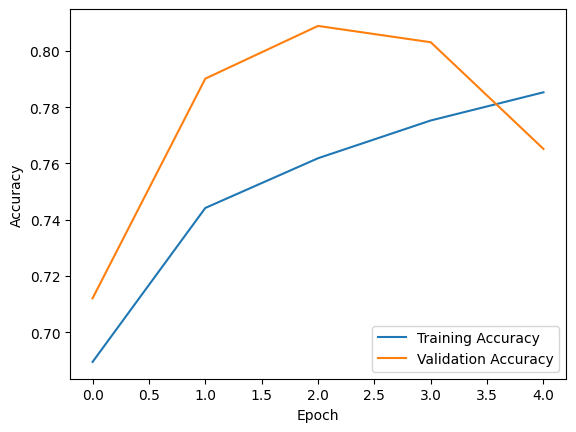

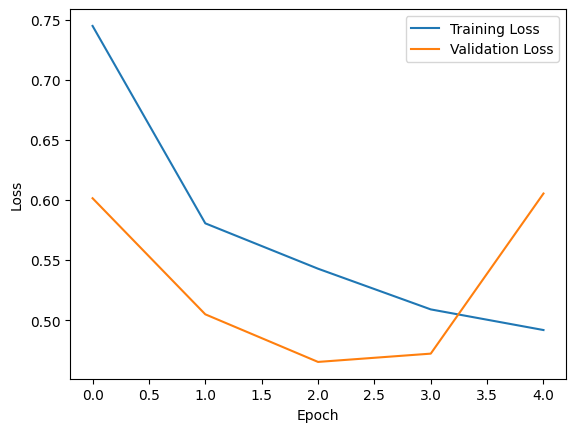

In [ ]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# Plot training and validation accuracy
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

72/72 [==============================] - 8s 105ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.81      0.71       543
           1       0.84      0.83      0.84      1530
           2       0.83      0.25      0.38       203

    accuracy                           0.77      2276
   macro avg       0.77      0.63      0.64      2276
weighted avg       0.79      0.77      0.76      2276

Confusion Matrix:
 [[ 438   99    6]
 [ 253 1273    4]
 [   7  146   50]]


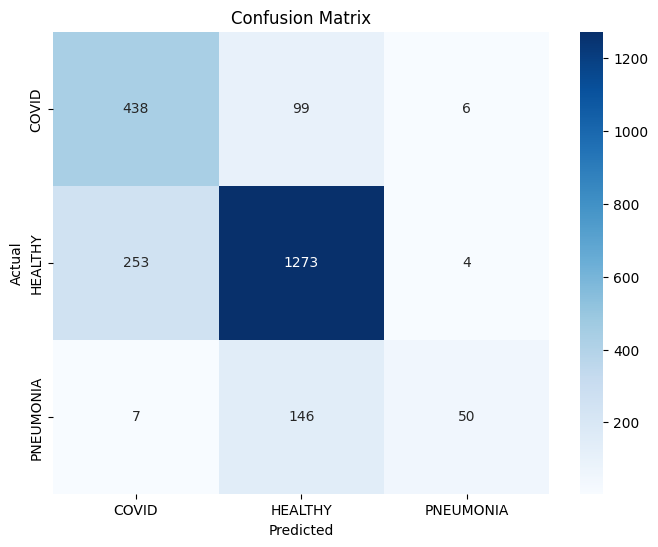

In [ ]:
# Predict classes for the test set
y_pred = model8.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes

# Print classification report and confusion matrix
print("Classification Report:\n", classification_report(y_true, y_pred_classes))


# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)
print("Confusion Matrix:\n", conf_matrix)

# Define class labels
class_labels = ["COVID", "HEALTHY", "PNEUMONIA"]

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Model 9 (Transfer learning from VGG16)


In [ ]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers
from tensorflow.keras import Model


# Set the paths to the training, validation, and testing sets
#train_path = '/content/drive/MyDrive/lung_dataset_split/train'
#val_path = '/content/drive/MyDrive/lung_dataset_split/val'
#test_path = '/content/drive/MyDrive/lung_dataset_split/test'

train_path = '/kaggle/input/lungdatsetsplit/lung_dataset_split/train'
val_path= '/kaggle/input/lungdatsetsplit/lung_dataset_split/val'
test_path= '/kaggle/input/lungdatsetsplit/lung_dataset_split/test'

# Define image size and batch size
img_size = (256, 256)
batch_size = 32
weights_path = '/kaggle/input/vgg16model/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'
# Load the pre-trained VGG16 model without the top (fully connected) layers
base_model = VGG16(weights=weights_path, include_top=False, input_shape=(img_size[0], img_size[1], 3))


In [ ]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [ ]:
# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification layers on top of the pre-trained model
x = layers.Flatten()(base_model.output)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dense(3, activation='softmax')(x)

# Create the final model
model9 = Model(base_model.input, x)

# Compile the model
model9.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

# Create data generator for validation (no augmentation)
validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_directory(
    val_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

# Create data generator for test (no augmentation)
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 10606 images belonging to 3 classes.
Found 2271 images belonging to 3 classes.
Found 2276 images belonging to 3 classes.


In [ ]:
# Train the model
history = model9.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=5,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)

Epoch 1/5
331/331 [==============================] - 182s 550ms/step - loss: 0.4141 - accuracy: 0.8506 - val_loss: 0.4864 - val_accuracy: 0.8375
Epoch 2/5
331/331 [==============================] - 189s 571ms/step - loss: 0.3700 - accuracy: 0.8593 - val_loss: 0.3076 - val_accuracy: 0.8683
Epoch 3/5
331/331 [==============================] - 192s 579ms/step - loss: 0.3223 - accuracy: 0.8751 - val_loss: 0.3226 - val_accuracy: 0.8826
Epoch 4/5
331/331 [==============================] - 187s 564ms/step - loss: 0.3112 - accuracy: 0.8785 - val_loss: 0.3132 - val_accuracy: 0.8768
Epoch 5/5
331/331 [==============================] - 185s 558ms/step - loss: 0.2858 - accuracy: 0.8900 - val_loss: 0.3471 - val_accuracy: 0.8714


In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model9.evaluate(test_generator)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

72/72 [==============================] - 12s 163ms/step - loss: 0.3137 - accuracy: 0.8682
Test Accuracy: 86.82%


In [ ]:
model9.save('/content/drive/MyDrive/lung_model9')

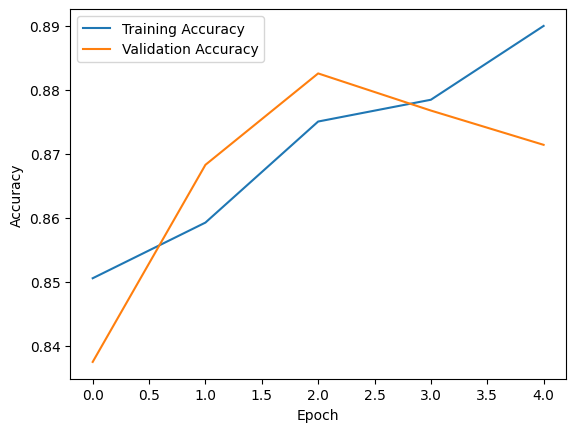

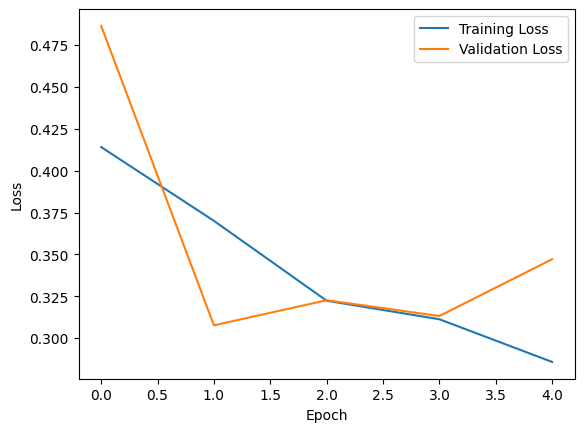

In [ ]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# Plot training and validation accuracy
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

72/72 [==============================] - 12s 169ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.67      0.79       543
           1       0.84      0.99      0.91      1530
           2       0.98      0.47      0.64       203

    accuracy                           0.87      2276
   macro avg       0.93      0.71      0.78      2276
weighted avg       0.88      0.87      0.86      2276

Confusion Matrix:
 [[ 363  179    1]
 [  12 1517    1]
 [   3  104   96]]


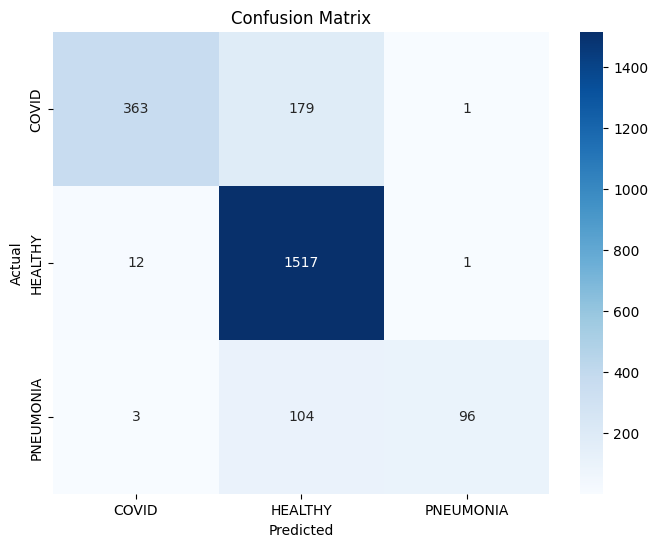

In [ ]:
# Predict classes for the test set
y_pred = model9.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes

# Print classification report and confusion matrix
print("Classification Report:\n", classification_report(y_true, y_pred_classes))


# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)
print("Confusion Matrix:\n", conf_matrix)

# Define class labels
class_labels = ["COVID", "HEALTHY", "PNEUMONIA"]

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()